**STEP - 1 Data Collection and Loading:-**

I loaded multiple economic data provided in the CSV files using Pandas. These included:

- Home Price Index

- 30-Year Fixed Mortgage Rate

- Consumer Price Index (CPI)

- Unemployment Rate

- Median Household Income

- Housing Starts

- Real GDP

A date time index was used and the dataset was parsed with the observation date, to do time series.

In [1]:
import pandas as pd

# Read all CSVs
home_price = pd.read_csv('CSUSHPISA.csv', parse_dates=['observation_date'], index_col='observation_date')
mortgage_rate = pd.read_csv('MORTGAGE30US.csv', parse_dates=['observation_date'], index_col='observation_date')
cpi = pd.read_csv('CPIAUCSL.csv', parse_dates=['observation_date'], index_col='observation_date')
unemployment = pd.read_csv('UNRATE.csv', parse_dates=['observation_date'], index_col='observation_date')
income = pd.read_csv('MEHOINUSA672N.csv', parse_dates=['observation_date'], index_col='observation_date')
housing_starts = pd.read_csv('HOUST.csv', parse_dates=['observation_date'], index_col='observation_date')
gdp = pd.read_csv('GDPC1.csv', parse_dates=['observation_date'], index_col='observation_date')

In [2]:
# Rename columns
home_price.rename(columns={'CSUSHPISA': 'Home_Price_Index'}, inplace=True)
mortgage_rate.rename(columns={'MORTGAGE30US': 'Mortgage_Rate'}, inplace=True)
cpi.rename(columns={'CPIAUCSL': 'CPI'}, inplace=True)
unemployment.rename(columns={'UNRATE': 'Unemployment_Rate'}, inplace=True)
income.rename(columns={'MEHOINUSA672N': 'Median_Income'}, inplace=True)
housing_starts.rename(columns={'HOUST': 'Housing_Starts'}, inplace=True)
gdp.rename(columns={'GDPC1': 'Real_GDP'}, inplace=True)

**STEP - 2 Data Cleaning and Preparation**

- For clarity (CSUSHPISA → Home_Price_Index) each dataset’s column’s name has been changed to a more descriptive title.

- 'All datasets were resampled to monthly frequency using 'MS' (monthstart) and case for missing values handled is using forward fill (ffill).

- An inner join of the datasets was then made to their time indices (combined_df) to keep the same observations across all variables.

In [3]:
# Resample everything to monthly and forward-fill missing values
datasets = [home_price, mortgage_rate, cpi, unemployment, income, housing_starts, gdp]
resampled = [df.resample('MS').ffill() for df in datasets]

# Merge them all
combined_df = resampled[0]
for df in resampled[1:]:
    combined_df = combined_df.join(df, how='inner')

In [4]:
# Final result
print(combined_df.head())

                  Home_Price_Index  Mortgage_Rate    CPI  Unemployment_Rate  \
observation_date                                                              
1987-01-01                  63.963           9.29  111.4                6.6   
1987-02-01                  64.423           9.08  111.8                6.6   
1987-03-01                  64.734           9.07  112.2                6.6   
1987-04-01                  65.130           9.03  112.7                6.3   
1987-05-01                  65.564          10.47  113.0                6.3   

                  Median_Income  Housing_Starts  Real_GDP  
observation_date                                           
1987-01-01                63060            1774  8986.367  
1987-02-01                63060            1784  8986.367  
1987-03-01                63060            1726  8986.367  
1987-04-01                63060            1614  9083.256  
1987-05-01                63060            1628  9083.256  


In [5]:
combined_df.to_csv("combined_housing_data.csv")


In [6]:
combined_df = pd.read_csv('/content/combined_housing_data.csv')
print(combined_df.columns)
print(combined_df.head())


Index(['observation_date', 'Home_Price_Index', 'Mortgage_Rate', 'CPI',
       'Unemployment_Rate', 'Median_Income', 'Housing_Starts', 'Real_GDP'],
      dtype='object')
  observation_date  Home_Price_Index  Mortgage_Rate    CPI  Unemployment_Rate  \
0       1987-01-01            63.963           9.29  111.4                6.6   
1       1987-02-01            64.423           9.08  111.8                6.6   
2       1987-03-01            64.734           9.07  112.2                6.6   
3       1987-04-01            65.130           9.03  112.7                6.3   
4       1987-05-01            65.564          10.47  113.0                6.3   

   Median_Income  Housing_Starts  Real_GDP  
0          63060            1774  8986.367  
1          63060            1784  8986.367  
2          63060            1726  8986.367  
3          63060            1614  9083.256  
4          63060            1628  9083.256  


In [7]:
# Convert 'observation_date' to datetime format
combined_df['observation_date'] = pd.to_datetime(combined_df['observation_date'])

# Create new columns
combined_df['Year'] = combined_df['observation_date'].dt.year
combined_df['Month'] = combined_df['observation_date'].dt.month
combined_df['Day'] = combined_df['observation_date'].dt.day

In [8]:
print(combined_df.head())

  observation_date  Home_Price_Index  Mortgage_Rate    CPI  Unemployment_Rate  \
0       1987-01-01            63.963           9.29  111.4                6.6   
1       1987-02-01            64.423           9.08  111.8                6.6   
2       1987-03-01            64.734           9.07  112.2                6.6   
3       1987-04-01            65.130           9.03  112.7                6.3   
4       1987-05-01            65.564          10.47  113.0                6.3   

   Median_Income  Housing_Starts  Real_GDP  Year  Month  Day  
0          63060            1774  8986.367  1987      1    1  
1          63060            1784  8986.367  1987      2    1  
2          63060            1726  8986.367  1987      3    1  
3          63060            1614  9083.256  1987      4    1  
4          63060            1628  9083.256  1987      5    1  


In [36]:
combined_df.to_csv("final_housing_data.csv")


In [9]:
# Check missing values
print("Missing values before handling:\n", combined_df.isnull().sum())

# Forward-fill again just to ensure any residual missing values are handled
combined_df = combined_df.ffill().bfill()

print("Missing values after handling:\n", combined_df.isnull().sum())


Missing values before handling:
 observation_date     0
Home_Price_Index     0
Mortgage_Rate        0
CPI                  0
Unemployment_Rate    0
Median_Income        0
Housing_Starts       0
Real_GDP             0
Year                 0
Month                0
Day                  0
dtype: int64
Missing values after handling:
 observation_date     0
Home_Price_Index     0
Mortgage_Rate        0
CPI                  0
Unemployment_Rate    0
Median_Income        0
Housing_Starts       0
Real_GDP             0
Year                 0
Month                0
Day                  0
dtype: int64


**STEP  - 3 📊 Feature Engineering**

Extracted Year and Month from the datetime index.

Calculated YoY (Year-over-Year) change for key features to capture trends:

- Home Price Index

- CPI

- Unemployment Rate

- Median Income

- Housing Starts

- Real GDP

Standardized these YoY features for consistent comparison.

In [15]:
# Ensure observation_date is datetime and set as index
if 'observation_date' in combined_df.columns:
    combined_df['observation_date'] = pd.to_datetime(combined_df['observation_date'])
    combined_df.set_index('observation_date', inplace=True)

# Columns to apply YoY
yoy_columns = ['Home_Price_Index', 'CPI', 'Median_Income', 'Housing_Starts', 'Real_GDP']

# Apply YoY percentage change only on selected columns
df_pct_change = combined_df[yoy_columns].pct_change(periods=12) * 100
df_pct_change = df_pct_change.add_suffix('_YoY')

# Combine original and YoY features
df_features = pd.concat([combined_df, df_pct_change], axis=1).dropna()

# Check result
print(df_features.head())

                  Home_Price_Index  Mortgage_Rate    CPI  Unemployment_Rate  \
observation_date                                                              
1988-01-01                  68.857          10.61  116.0                5.7   
1988-02-01                  69.261          10.16  116.2                5.7   
1988-03-01                  69.636           9.87  116.5                5.7   
1988-04-01                  69.974          10.05  117.2                5.4   
1988-05-01                  70.425          10.28  117.5                5.6   

                  Median_Income  Housing_Starts  Real_GDP  Year  Month  Day  \
observation_date                                                              
1988-01-01                63530            1271  9367.502  1988      1    1   
1988-02-01                63530            1473  9367.502  1988      2    1   
1988-03-01                63530            1532  9367.502  1988      3    1   
1988-04-01                63530            1573  94

In [16]:
from sklearn.preprocessing import StandardScaler

# Columns to scale
columns_to_scale = [
    'Home_Price_Index', 'CPI', 'Median_Income', 'Housing_Starts', 'Real_GDP',
    'Home_Price_Index_YoY', 'CPI_YoY', 'Median_Income_YoY', 'Housing_Starts_YoY', 'Real_GDP_YoY'
]

# Copy original dataframe
df_to_scale = df_features.copy()

# Initialize scaler
scaler = StandardScaler()

# Apply scaler only on selected columns
df_to_scale[columns_to_scale] = scaler.fit_transform(df_to_scale[columns_to_scale])

# Now df_to_scale has scaled selected features
print(df_to_scale.head())


                  Home_Price_Index  Mortgage_Rate       CPI  \
observation_date                                              
1988-01-01               -1.265344          10.61 -1.753301   
1988-02-01               -1.258256          10.16 -1.748948   
1988-03-01               -1.251677           9.87 -1.742419   
1988-04-01               -1.245747          10.05 -1.727184   
1988-05-01               -1.237835          10.28 -1.720655   

                  Unemployment_Rate  Median_Income  Housing_Starts  Real_GDP  \
observation_date                                                               
1988-01-01                      5.7      -1.029505       -0.146891 -1.645980   
1988-02-01                      5.7      -1.029505        0.381153 -1.645980   
1988-03-01                      5.7      -1.029505        0.535383 -1.645980   
1988-04-01                      5.4      -1.029505        0.642561 -1.612461   
1988-05-01                      5.6      -1.029505        0.245221 -1.612461  

**4. 📈 Data Visualization**

I used Matplotlib and Seaborn to explore the data visually:

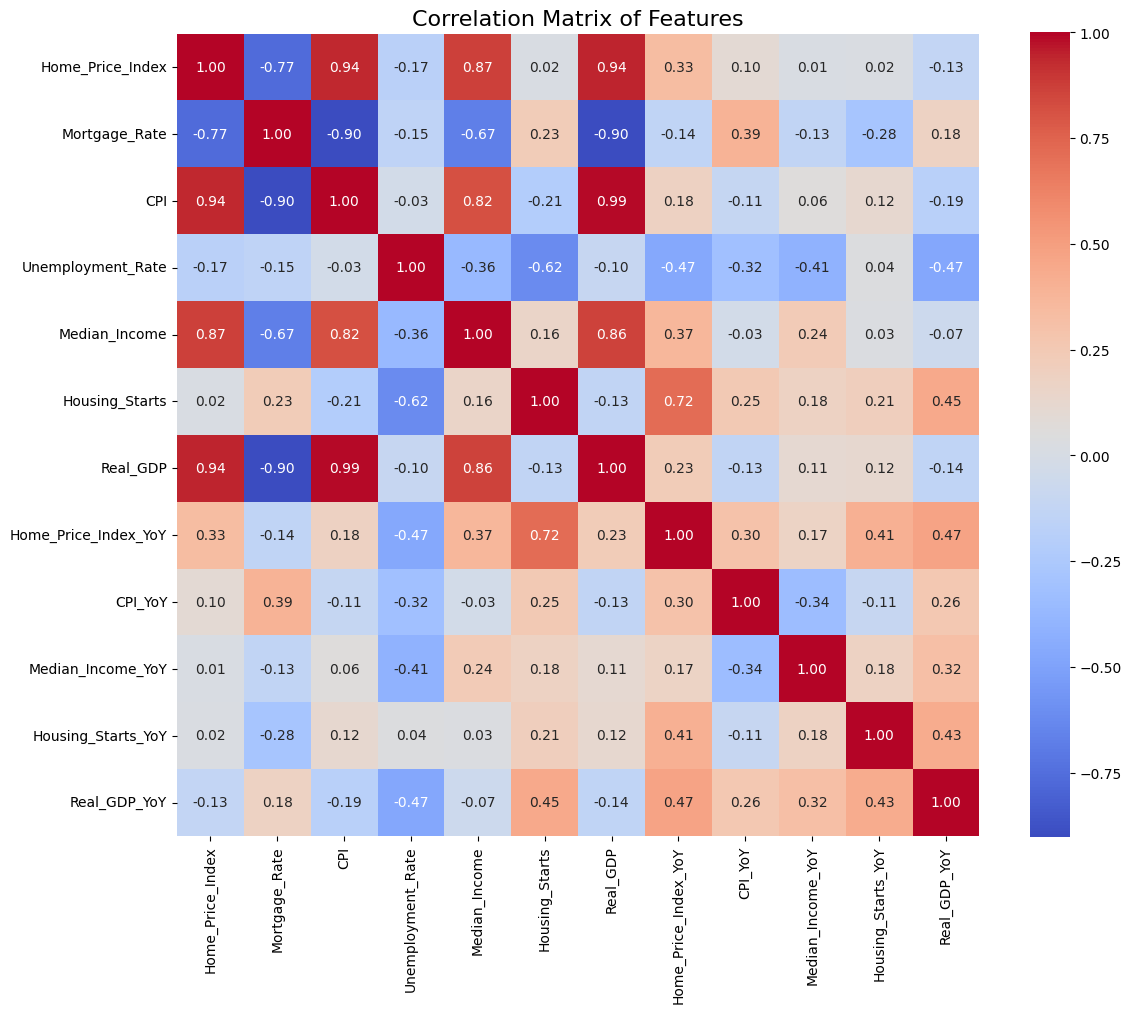

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a copy to avoid modifying original
corr_df = df_to_scale.copy()

# Drop date part columns if present (they're usually not useful in correlation)
cols_to_drop = ['Year', 'Month', 'Day']
corr_df = corr_df.drop(columns=[col for col in cols_to_drop if col in corr_df.columns])

# Compute correlation matrix
corr_matrix = corr_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix of Features", fontsize=16)
plt.tight_layout()
plt.show()


**Line Plot of Home Price Index Over Time**

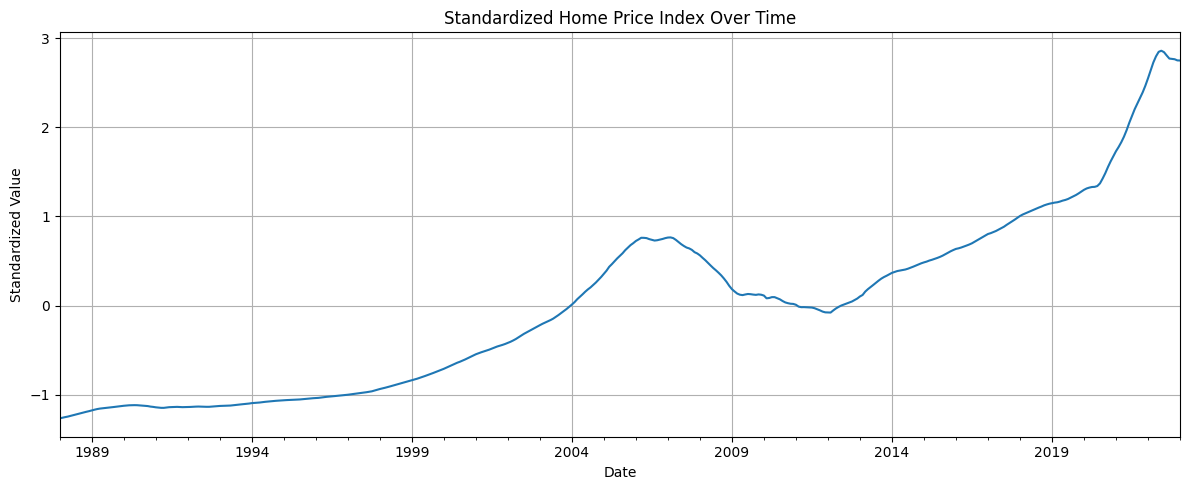

In [18]:
plt.figure(figsize=(12, 5))
df_to_scale['Home_Price_Index'].plot()
plt.title("Standardized Home Price Index Over Time")
plt.xlabel("Date")
plt.ylabel("Standardized Value")
plt.grid(True)
plt.tight_layout()
plt.show()


**YoY Trends Over Time**

<Figure size 1200x500 with 0 Axes>

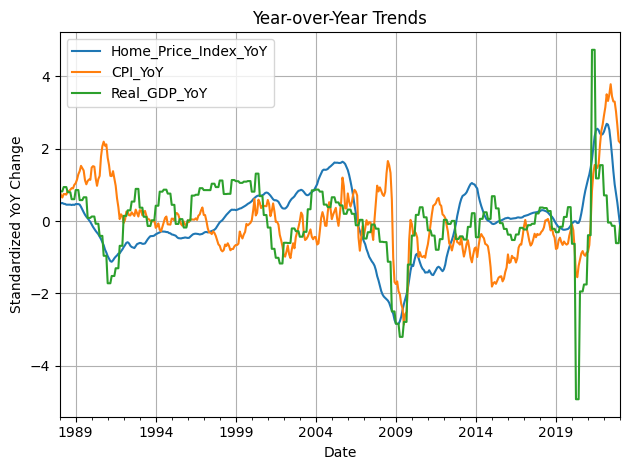

In [20]:
plt.figure(figsize=(12, 5))
df_to_scale[['Home_Price_Index_YoY', 'CPI_YoY', 'Real_GDP_YoY']].plot()
plt.title("Year-over-Year Trends")
plt.xlabel("Date")
plt.ylabel("Standardized YoY Change")
plt.grid(True)
plt.tight_layout()
plt.show()


**Pairplot of Key Economic Indicators**

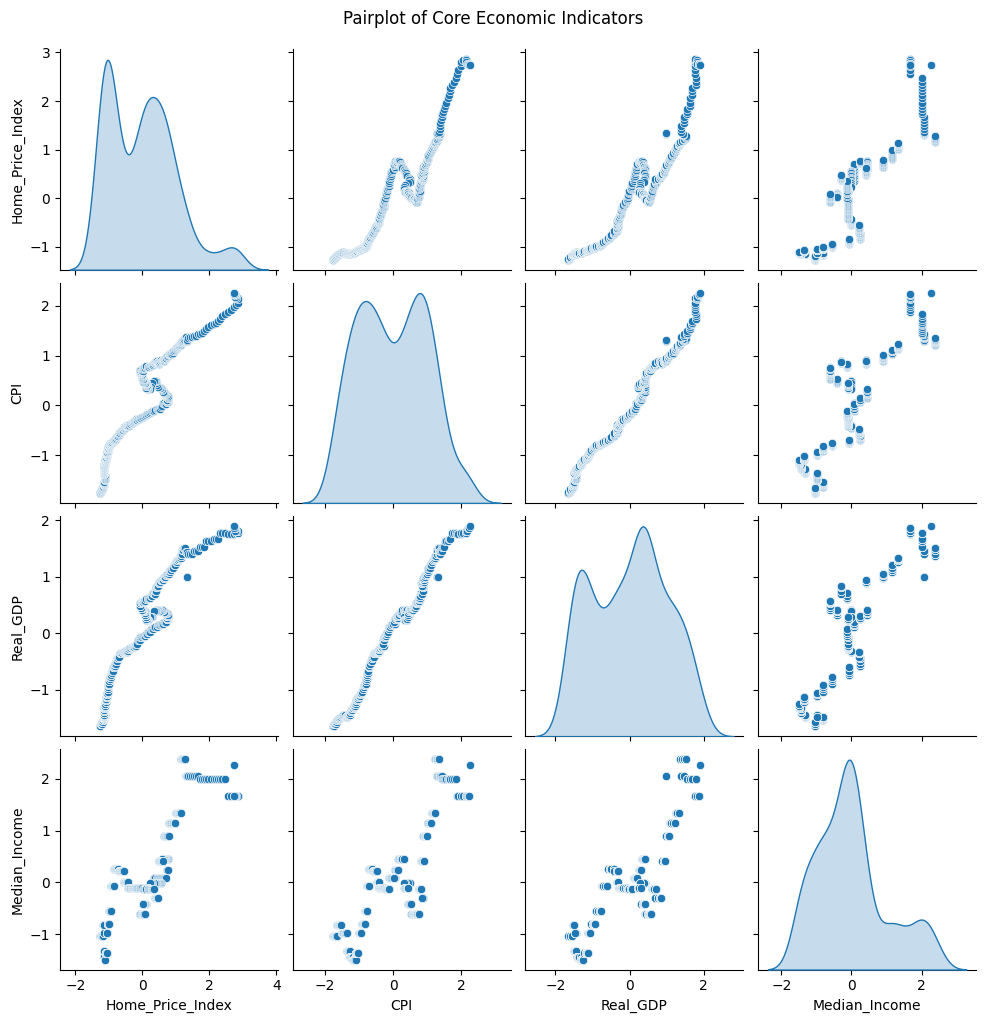

In [21]:
sns.pairplot(df_to_scale[['Home_Price_Index', 'CPI', 'Real_GDP', 'Median_Income']], diag_kind='kde')
plt.suptitle("Pairplot of Core Economic Indicators", y=1.02)
plt.show()


**Bar Plot of Average YoY Changes**

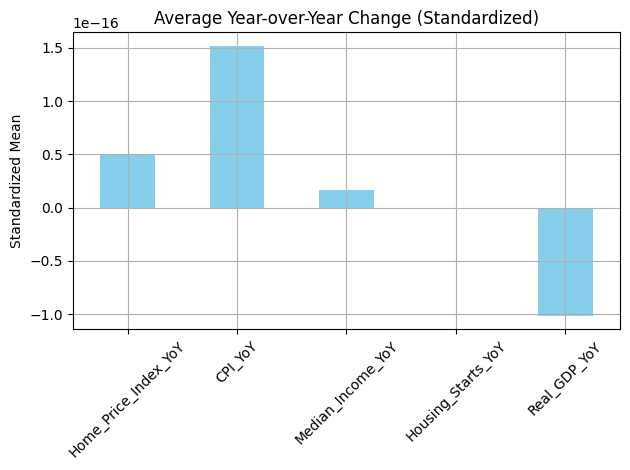

In [22]:
avg_yoy = df_to_scale[['Home_Price_Index_YoY', 'CPI_YoY', 'Median_Income_YoY', 'Housing_Starts_YoY', 'Real_GDP_YoY']].mean()
avg_yoy.plot(kind='bar', color='skyblue')
plt.title("Average Year-over-Year Change (Standardized)")
plt.ylabel("Standardized Mean")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


**Distribution Plot of Home Price Index**

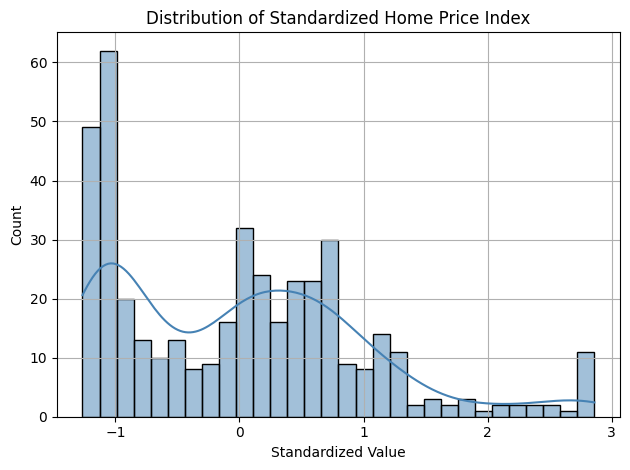

In [23]:
sns.histplot(df_to_scale['Home_Price_Index'], kde=True, bins=30, color='steelblue')
plt.title("Distribution of Standardized Home Price Index")
plt.xlabel("Standardized Value")
plt.grid(True)
plt.tight_layout()
plt.show()


**Build a Data Science Model**

**Models Implemented:**

- Linear Regression

- Random Forest Regressor

- Support Vector Regressor (SVR)

- XGBoost Regressor

In [34]:
# STEP 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor  # Added XGBoost

# STEP 2: Define X (features) and y (target)
# Assume you want to predict 'Home_Price_Index'
X = df_to_scale.drop(columns=['Home_Price_Index'])  # all columns except target
y = df_to_scale['Home_Price_Index']  # target column

# STEP 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 4: Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Regressor (SVR)": SVR(),
    "XGBoost Regressor": XGBRegressor(random_state=42)  # Added here
}

# STEP 5: Train and Evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MSE": mse, "RMSE": rmse, "R2_Score": r2}

# STEP 6: Display results
results_df = pd.DataFrame(results).T
print("Model Performance:\n")
print(results_df)

# Optional: Let see which model performed the best
best_model = results_df['R2_Score'].idxmax()
print(f"\nBest Model: {best_model}")


Model Performance:

                                     MSE      RMSE  R2_Score
Linear Regression               0.024831  0.157577  0.982317
Random Forest                   0.000427  0.020674  0.999696
Support Vector Regressor (SVR)  1.369263  1.170155  0.024876
XGBoost Regressor               0.000672  0.025920  0.999522

Best Model: Random Forest


**CONCLUSION:-**

In order to analyze the differences in housing prices of the past 20 years, we collected key publicly available U.S. economic datasets and find their impact. Then, several models are built and compared to find the most accurate one, and the Random Forest shows the best performance with its highest R². That means that factors such as GDP, income, unemployment, mortgage rates have a strong impact on home price trends.